In [2]:
# !pip install matplotlib

In [4]:
# !pip install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('bdp.csv')
data.head()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72


In [2]:
data.isnull().sum()

Sl. No.               0
Pulse                 0
Systolic Pressure     0
Diastolic Pressure    0
dtype: int64

In [3]:
data.dropna(axis=1)

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72
...,...,...,...,...
145,146,70,130,81
146,147,78,126,74
147,148,72,124,82
148,149,71,125,83


In [4]:
df=data.drop(['Sl. No.'],axis=1)
df.head()

,Pulse,Systolic Pressure,Diastolic Pressure
0,73,128,78
1,71,127,73
2,71,129,78
3,68,125,69
4,68,125,72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Pulse               150 non-null    int64
 1   Systolic Pressure   150 non-null    int64
 2   Diastolic Pressure  150 non-null    int64
dtypes: int64(3)
memory usage: 3.6 KB


In [6]:
df.describe()

,Pulse,Systolic Pressure,Diastolic Pressure
count,150.000000,150.000000,150.000000
mean,75.153333,124.406667,76.533333
std,5.994110,4.000162,5.288542
min,66.000000,109.000000,67.000000
25%,71.000000,122.000000,73.000000
50%,73.000000,125.000000,76.000000
75%,78.750000,127.000000,79.750000
max,93.000000,134.000000,92.000000


In [7]:
x=df.iloc[:,:1]#pulse
y=df.iloc[:,-1]#diastolic
z=df.iloc[:,-2]#systolic
print(x)

     Pulse
0       73
1       71
2       71
3       68
4       68
..     ...
145     70
146     78
147     72
148     71
149     82

[150 rows x 1 columns]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr= LinearRegression()
lr.fit(l_train,r_train)

LinearRegression()

In [9]:
!pip install streamlit

In [10]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [12]:
import streamlit as st
import pickle
import matplotlib.pyplot as plt

filename = 'finalized_model_surajit.pickle'
pickle.dump(lr, open(filename, 'wb'))

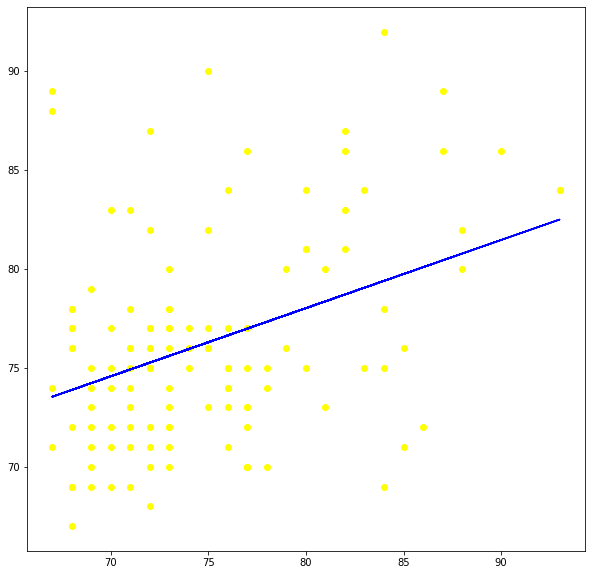

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(l_train,r_train,color='yellow')
plt.plot(l_train,lr.predict(l_train),color='blue')
plt.show()


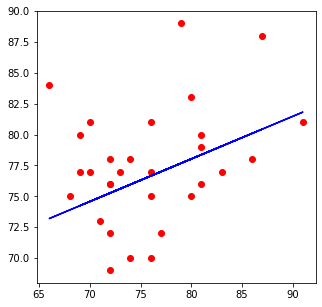

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(l_test,r_test,color='red')
plt.plot(l_test,lr.predict(l_test),color='blue')
plt.show()

In [12]:
y1=df.iloc[:,1:3]
x1=df.iloc[:,:-2]
y1.head()

,Systolic Pressure,Diastolic Pressure
0,128,78
1,127,73
2,129,78
3,125,69
4,125,72


In [13]:
x1.head()

,Pulse
0,73
1,71
2,71
3,68
4,68


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
pred=lr.predict(x_test)
pred

array([[124.85296044,  77.19957505],
       [123.79992588,  74.74903081],
       [123.53666724,  74.13639474],
       [123.53666724,  74.13639474],
       [123.79992588,  74.74903081],
       [124.72133112,  76.89325702],
       [126.5641416 ,  81.18170945],
       [125.37947772,  78.42484717],
       [125.64273636,  79.03748323],
       [125.905995  ,  79.65011929],
       [125.64273636,  79.03748323],
       [124.85296044,  77.19957505],
       [126.03762432,  79.95643732],
       [124.45807248,  76.28062096],
       [123.79992588,  74.74903081],
       [124.5897018 ,  76.58693899],
       [125.2478484 ,  78.11852914],
       [124.19481384,  75.6679849 ],
       [125.37947772,  78.42484717],
       [123.79992588,  74.74903081],
       [123.79992588,  74.74903081],
       [124.19481384,  75.6679849 ],
       [125.51110704,  78.7311652 ],
       [124.19481384,  75.6679849 ],
       [124.98458976,  77.50589308],
       [126.03762432,  79.95643732],
       [123.66829656,  74.44271278],
 

In [16]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

4.610966686236845

In [28]:
n=int(input())
x=[[n]]
p=lr.predict(x)
print("Predicted value",p)

77
Predicted value [[124.85296044  77.19957505]]
